# Results notebook

In this notebook, I have tested out the different algorithms:
- how long they take to find the goal position
- memory usage
- how optimal is the path, this is shown by:
    - distance of the path
    - how many turns need to be taken
    - also modelling the acceleration of the mouse, we can account for the time it "would" take in real time to travel a path 

In [1]:
from algorithms.utilities.Utils import Utils
from algorithms.utilities.Stats import Stats

from algorithms.classical.floodfill.FloodFill import FloodFill
from algorithms.classical.bfs.BFS import BFS
from algorithms.classical.dijkstra.Dijkstra import Dijkstra
from algorithms.classical.astar.AStar import AStar

from algorithms.reinforcement_learning.sarsa.Sarsa import Sarsa
from algorithms.reinforcement_learning.q_learning.Qlearning import QLearning
from algorithms.reinforcement_learning.dynaq.DynaQLearning import DynaQLearning
from algorithms.reinforcement_learning.dynaq.DynaQSarsa import DynaQSarsa

In [2]:
maze = Utils.load_maze('mazes/competition_json/AAMC23Maze.json')

## Classical Algorithms

### Floodfill

In [3]:
flood = FloodFill(walls=maze)
flood_path = flood.get_path_from_flood_map()
print(flood.get_stats())

(37, 18, 0)


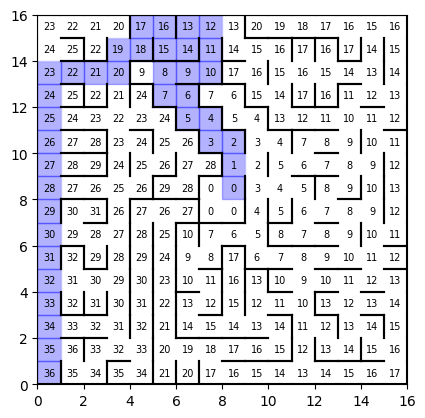

In [4]:
Utils().draw_maze(walls=maze, path=flood_path, dist_map= flood.flood_map)

In [5]:
stats = Stats()
print(stats.get_time_from_path(flood_path))

41.41002029339273


### BFS

In [6]:
bfs = BFS(walls=maze)
bfs_path = bfs.find_shortest_path_to_goal()
print(bfs.get_stats())

0
(37, 18, 0)


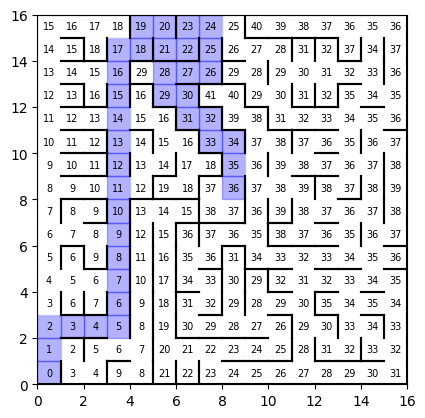

In [7]:
Utils().draw_maze(walls=maze, path=bfs_path, dist_map = bfs.distances)

In [8]:
stats = Stats()
print(stats.get_time_from_path(bfs_path))

41.837386889493764


### Dijkstra

In [9]:
dijkstra = Dijkstra(walls=maze)
dijkstra_path = dijkstra.find_shortest_path_to_goal()
print(dijkstra.get_stats())

(37, 18, 0)


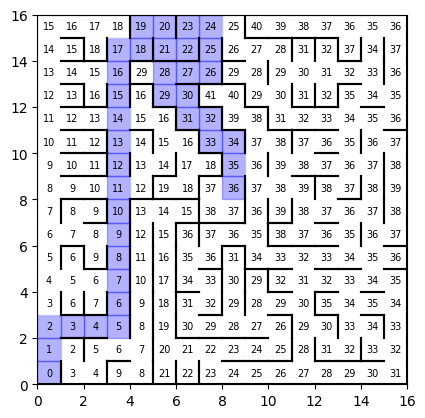

In [10]:
Utils().draw_maze(walls=maze, path=dijkstra_path, dist_map = dijkstra.distances)

In [11]:
print(stats.get_time_from_path(dijkstra_path))

41.837386889493764


### A*

In [12]:
astar = AStar(walls=maze)
astar_path = astar.find_shortest_path_to_goal()
print(astar.get_stats())

Filename: D:\Diss\Simulator\final\algorithms\classical\astar\AStar.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    51    123.2 MiB    123.2 MiB           1       @profile
    52                                             def find_shortest_path_to_goal(self):
    53    123.2 MiB      0.0 MiB           1           self.a_star()
    54    123.2 MiB      0.0 MiB           9           goal_position = min(self.goal_positions, key=lambda pos: self.distances[pos[0]][pos[1]])
    55    123.2 MiB      0.0 MiB           1           self.curr_position = goal_position
    56    123.2 MiB      0.0 MiB           1           self.path.append(self.curr_position)
    57                                         
    58    123.2 MiB      0.0 MiB          37           while self.curr_position != self.start_position:
    59    123.2 MiB      0.0 MiB          36               x, y = self.curr_position
    60    123.2 MiB      0.0 MiB         252               neighbors = [(x + dx, y + d

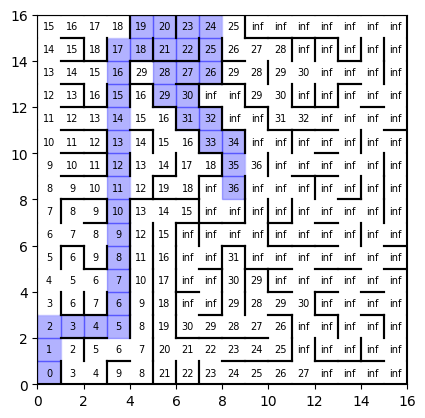

In [13]:
Utils().draw_maze(walls=maze, path=astar_path, dist_map = astar.distances)

In [14]:
stats = Stats()
print(stats.get_time_from_path(astar_path))

41.837386889493764


## Reinforcememnt Learning

### Sarsa

In [15]:
sarsa = Sarsa(walls=maze)

Running agent: 0
stopped at episode: 170
Running agent: 1
stopped at episode: 323
Running agent: 2
stopped at episode: 337
Running agent: 3
stopped at episode: 193
Running agent: 4
stopped at episode: 212
Running agent: 5
stopped at episode: 306
Running agent: 6
stopped at episode: 447
Running agent: 7
stopped at episode: 172
Running agent: 8
stopped at episode: 198
Running agent: 9
stopped at episode: 201
Running agent: 10
stopped at episode: 303
Running agent: 11
stopped at episode: 128
Running agent: 12
stopped at episode: 318
Running agent: 13
stopped at episode: 170
Running agent: 14
stopped at episode: 257
Choose path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (4, 14), (4, 15), (5, 15), (5, 14), (6, 14), (6, 15), (7, 15), (7, 14), (7, 13), (6, 13), (5, 13), (5, 12), (6, 12), (6, 11), (7, 11), (7, 10), (8, 10), (8, 9), (8, 8)], time: 41.837386889493764


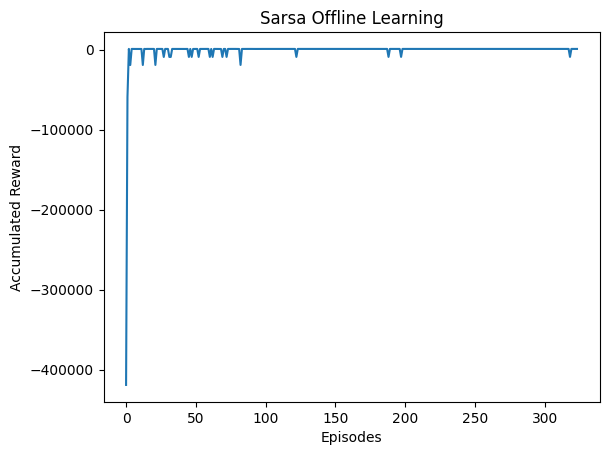

In [16]:
sarsa.run_sarsa()
sarsa_path = sarsa.get_path()

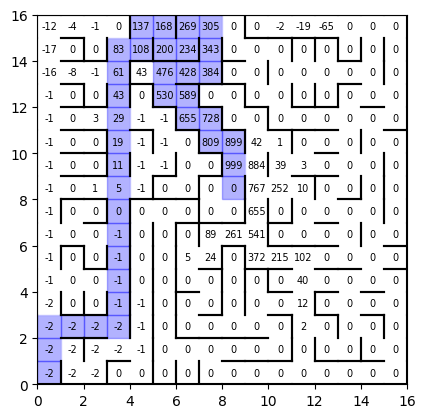

In [17]:
Utils.draw_maze(walls=maze, dist_map=sarsa.get_max_q_values(), path=sarsa_path)

In [18]:
stats = Stats()
stats.get_time_from_path(sarsa_path)

41.837386889493764

### QLearning


Running agent: 0
stopped at episode: 164
Running agent: 1
stopped at episode: 202
Running agent: 2
stopped at episode: 180
Running agent: 3
stopped at episode: 213
Running agent: 4
stopped at episode: 203
Running agent: 5
stopped at episode: 218
Running agent: 6
stopped at episode: 161
Running agent: 7
stopped at episode: 195
Running agent: 8
stopped at episode: 194
Running agent: 9
stopped at episode: 198
Running agent: 10
stopped at episode: 167
Running agent: 11
stopped at episode: 191
Running agent: 12
stopped at episode: 174
Running agent: 13
stopped at episode: 201
Running agent: 14
stopped at episode: 185
Choose path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (3, 1), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (5, 7), (5, 6), (5, 5), (5, 4), (5, 3), (5, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (10, 2), (9, 2), (8, 2), (7, 2), (6, 2), (6, 3), (7, 3), (7, 4), (6, 4), (6, 5), (7, 5), (7, 6), (8, 6), (9, 6), (9, 7), (9, 8), (9, 9), (8, 9), (8, 8)], tim

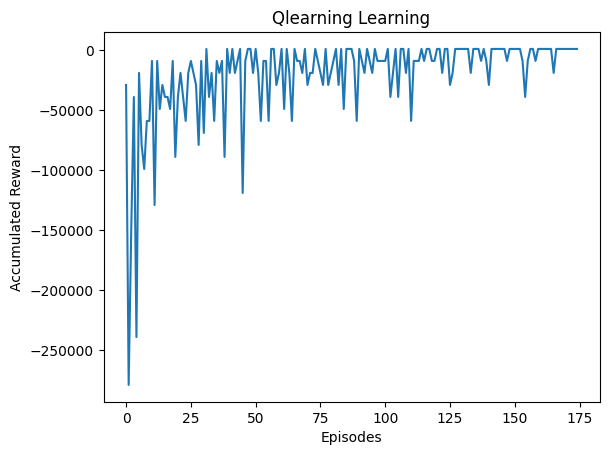

In [19]:
qlearning = QLearning(walls=maze)
qlearning.run_qlearning()
qlearning_path = qlearning.get_path()

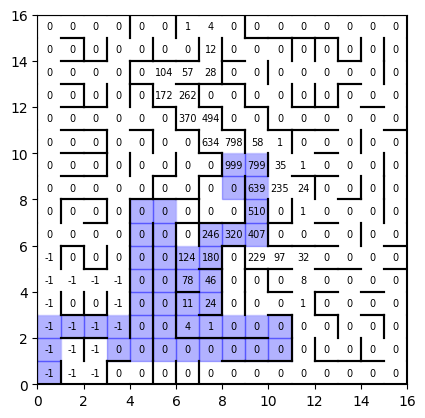

In [20]:
Utils.draw_maze(walls=maze, dist_map=qlearning.get_max_q_values(), path=qlearning_path)


In [21]:
stats = Stats()
stats.get_time_from_path(qlearning_path)

49.45500929214304

### DynaQ QLearning

Running agent: 0
stopped at episode: 10
Running agent: 1
stopped at episode: 7
Running agent: 2
stopped at episode: 6
Running agent: 3
stopped at episode: 14
Running agent: 4
stopped at episode: 10
Running agent: 5
stopped at episode: 16
Running agent: 6
stopped at episode: 11
Running agent: 7
stopped at episode: 10
Running agent: 8
stopped at episode: 15
Running agent: 9
stopped at episode: 8
Running agent: 10
stopped at episode: 23
Running agent: 11
stopped at episode: 26
Running agent: 12
stopped at episode: 10
Running agent: 13
stopped at episode: 13
Running agent: 14
stopped at episode: 7
Choose path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (3, 1), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (5, 7), (5, 6), (5, 5), (5, 4), (5, 3), (5, 2), (5, 1), (6, 1), (7, 1), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (11, 1), (11, 2), (11, 3), (11, 4), (11, 5), (10, 5), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9), (8, 9), (8, 8)], time: 38.17112233970321


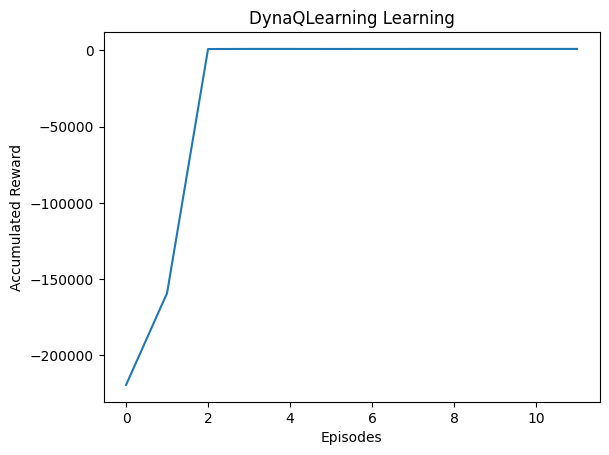

In [22]:
dyna_qlearning = DynaQLearning(walls=maze)
dyna_qlearning.run_dyna_qlearning()
dyna_qlearning_path = dyna_qlearning.get_path()

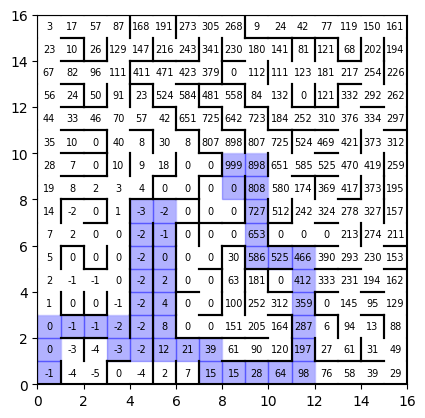

In [23]:
Utils.draw_maze(walls=maze, dist_map=dyna_qlearning.get_max_q_values(), path=dyna_qlearning_path)

In [24]:
stats = Stats()
stats.get_time_from_path(dyna_qlearning_path)

38.17112233970321

### DynaQ Sarsa


Running agent: 0
stopped at episode: 17
Running agent: 1
stopped at episode: 15
Running agent: 2
stopped at episode: 33
Running agent: 3
stopped at episode: 21
Running agent: 4
stopped at episode: 8
Running agent: 5
Running agent: 6
stopped at episode: 16
Running agent: 7
stopped at episode: 7
Running agent: 8
stopped at episode: 26
Running agent: 9
stopped at episode: 12
Running agent: 10
stopped at episode: 85
Running agent: 11
stopped at episode: 19
Running agent: 12
stopped at episode: 17
Running agent: 13
stopped at episode: 19
Running agent: 14
stopped at episode: 38
Choose path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (1, 13), (2, 13), (3, 13), (3, 14), (4, 14), (4, 15), (5, 15), (5, 14), (6, 14), (6, 15), (7, 15), (7, 14), (7, 13), (6, 13), (5, 13), (5, 12), (6, 12), (6, 11), (7, 11), (7, 10), (8, 10), (8, 9), (8, 8)], time: 41.41002029339273


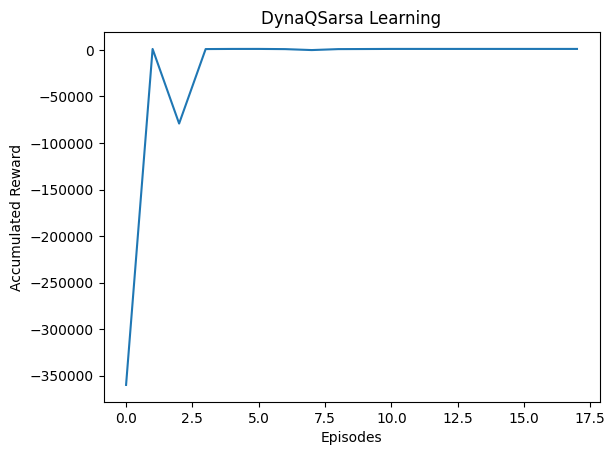

In [25]:
dynaq_sarsa = DynaQSarsa(walls=maze)
dynaq_sarsa.run_dyna_sarsa()
dynaq_sarsa_path = dynaq_sarsa.get_path()

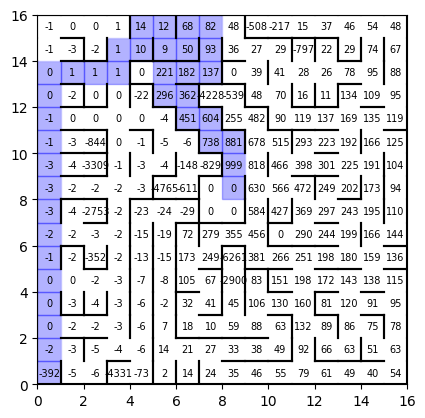

In [26]:
Utils.draw_maze(walls=maze, dist_map=dynaq_sarsa.get_max_q_values(), path=dynaq_sarsa_path)

In [27]:
stats = Stats()
stats.get_time_from_path(dynaq_sarsa_path)

41.41002029339273

In [28]:
# Max deceleration on micro-mouse when calculating reward
1/(2*0.09)

5.555555555555555